In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [ ]:
DATA_PATH = "/content/drive/MyDrive/uidai_hackathon/data/processed/lifecycle_aggregated.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["date"])

df.head()


,date,state,district_x,pincode_x,age_0_5,age_5_17,age_18_greater,district_y,pincode_y,demo_age_5_17,demo_age_17_,district,pincode,bio_age_5_17,bio_age_17_,total_enrolment,demographic_updates,biometric_updates,DUI,BUBI
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,0,0.0,0.0,0.0,0,0.0,0.0,0.0,109,0.0,0.0,0.0,0.0
1,2025-03-09,Bihar,SitamarhiSitamarhiPurbi ChamparanSitamarhiSita...,6723137,206,633,166,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1005,0.0,0.0,0.0,0.0
2,2025-03-09,Delhi,West DelhiWest Delhi,220077,122,53,57,0,0.0,0.0,0.0,0,0.0,0.0,0.0,232,0.0,0.0,0.0,0.0
3,2025-03-09,Haryana,FaridabadGurugram,243005,98,79,23,0,0.0,0.0,0.0,0,0.0,0.0,0.0,200,0.0,0.0,0.0,0.0
4,2025-03-09,Karnataka,Bengaluru UrbanBengaluru UrbanBengaluru UrbanB...,2240159,63,80,105,0,0.0,0.0,0.0,0,0.0,0.0,0.0,248,0.0,0.0,0.0,0.0


In [ ]:
state_features = (
    df.groupby("state")
    .agg(
        avg_enrolment=("total_enrolment", "mean"),
        avg_dui=("DUI", "mean"),
        avg_bubi=("BUBI", "mean")
    )
    .reset_index()
)

state_features.head()


,state,avg_enrolment,avg_dui,avg_bubi
0,100000,10.380952,0.000000,0.000000
1,Andaman & Nicobar Islands,2.280000,5.365000,2.550000
2,Andaman and Nicobar Islands,6.107692,10.967518,25.143275
3,Andhra Pradesh,1557.085366,22.486865,90.250368
4,Arunachal Pradesh,55.692308,6.869670,16.680961


In [ ]:
X = state_features[["avg_enrolment", "avg_dui", "avg_bubi"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
state_features["cluster"] = kmeans.fit_predict(X_scaled)

state_features.head()


,state,avg_enrolment,avg_dui,avg_bubi,cluster
0,100000,10.380952,0.000000,0.000000,0
1,Andaman & Nicobar Islands,2.280000,5.365000,2.550000,0
2,Andaman and Nicobar Islands,6.107692,10.967518,25.143275,0
3,Andhra Pradesh,1557.085366,22.486865,90.250368,0
4,Arunachal Pradesh,55.692308,6.869670,16.680961,0


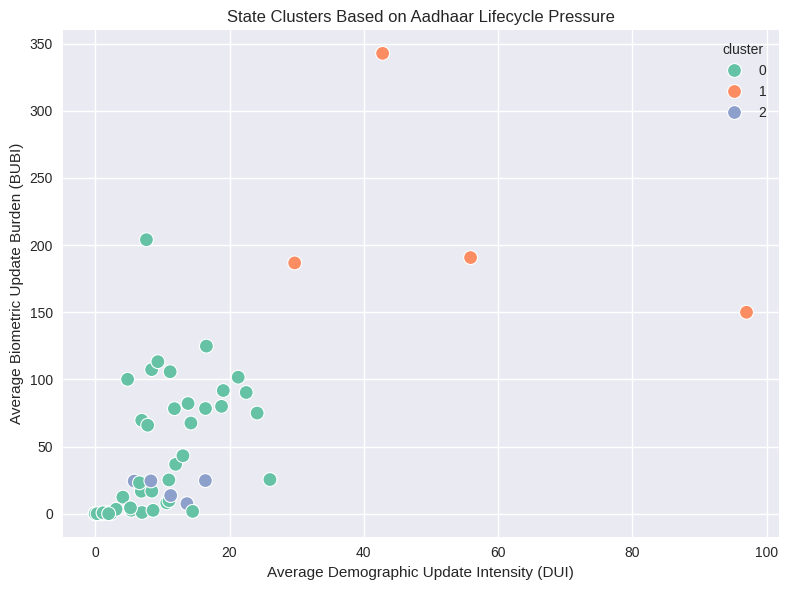

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=state_features,
    x="avg_dui",
    y="avg_bubi",
    hue="cluster",
    palette="Set2",
    s=100
)

plt.title("State Clusters Based on Aadhaar Lifecycle Pressure")
plt.xlabel("Average Demographic Update Intensity (DUI)")
plt.ylabel("Average Biometric Update Burden (BUBI)")
plt.tight_layout()
plt.show()


In [ ]:
FIG_PATH = "/content/drive/MyDrive/uidai_hackathon/figures/final"

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=state_features,
    x="avg_dui",
    y="avg_bubi",
    hue="cluster",
    palette="Set2",
    s=100
)

plt.title("State Clusters Based on Aadhaar Lifecycle Pressure")
plt.xlabel("Average Demographic Update Intensity (DUI)")
plt.ylabel("Average Biometric Update Burden (BUBI)")
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/state_lifecycle_clusters.png", dpi=300)
plt.close()


In [ ]:
cluster_summary = (
    state_features.groupby("cluster")[["avg_enrolment", "avg_dui", "avg_bubi"]]
    .mean()
)

cluster_summary


,avg_enrolment,avg_dui,avg_bubi
cluster,,,
0,417.840189,8.677810,40.643148
1,3199.572019,56.343578,217.532700
2,6559.275773,11.077728,18.894100


In [ ]:
state_features.to_csv(
    "/content/drive/MyDrive/uidai_hackathon/state_lifecycle_clusters.csv",
    index=False
)


In [ ]:
import os

FIG_PATH = "/content/drive/MyDrive/uidai_hackathon/figures/final"

files = sorted(os.listdir(FIG_PATH))
files


['agewise_enrolment_trend.png',
 'dui_vs_bubi_scatter.png',
 'lifecycle_pressure_scatter.png',
 'national_enrolment_trend.png',
 'state_lifecycle_clusters.png',
 'top10_states_bubi.png',
 'top10_states_dui.png',
 'top10_states_enrolment.png']